In [58]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
start ="2010-01-01"
end ="2019-12-31"
df =data.DataReader("AAPL","yahoo",start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526476
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422665
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410790
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.453412


In [60]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.623215
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.004578
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,70.977623
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.398888
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,71.920578


In [61]:
df =df.reset_index ()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526476
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422665
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410790
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.453412


In [62]:
df =df.drop(["Date", "Adj Close"], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


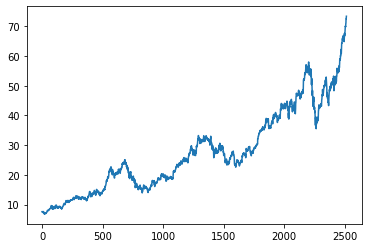

In [63]:
plt.plot(df["Close"])

In [64]:
df


,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0
...,...,...,...,...,...
2511,71.222504,70.730003,71.172501,71.067497,48478800.0
2512,72.495003,71.175003,71.205002,72.477501,93121200.0
2513,73.492500,72.029999,72.779999,72.449997,146266000.0
2514,73.172501,71.305000,72.364998,72.879997,144114400.0


In [65]:
ma100 =df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
2515    60.331875
Name: Close, Length: 2516, dtype: float64

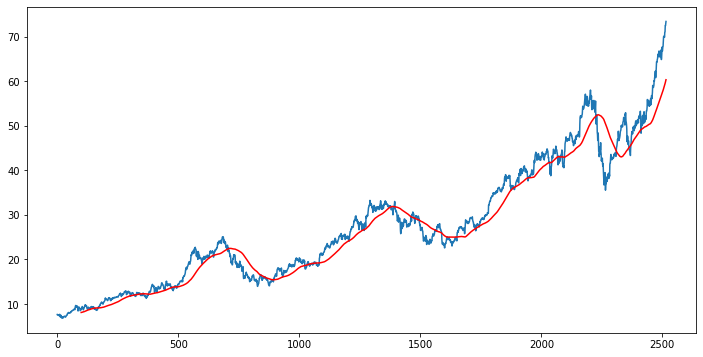

In [66]:
plt.figure(figsize =(12,6))
plt.plot (df.Close)
plt.plot (ma100,'r' )

In [67]:
ma200 =df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
2515    54.793137
Name: Close, Length: 2516, dtype: float64

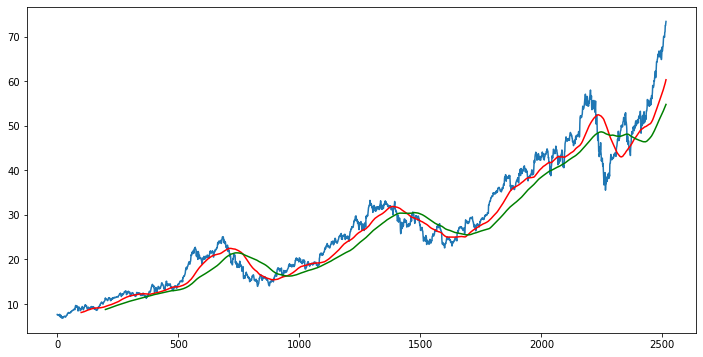

In [68]:
plt.figure(figsize =(12,6))
plt.plot (df.Close)
plt.plot (ma100,'r' )
plt.plot (ma200,'g' )

In [69]:
df.shape

(2516, 5)

In [70]:
#Sptitting Dota tnto Training and Testing
data_training =pd.DataFrame(df[ "Close" ][0: int (len(df)*0.70)])
data_testing =pd.DataFrame (df[ "Close" ][int (len(df)*0.70): int (len(df))])
print (data_training.shape)
print (data_testing.shape)

(1761, 1)
(755, 1)


In [71]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [72]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range =(0, 1))
data_training_array =scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.85089656],
       [0.84616011],
       [0.84587593]])

In [74]:
x_train=[]
y_train=[]
for i in range(100, data_training_array.shape[0]) :
         x_train.append ( data_training_array[i-100: i])
         y_train.append (data_training_array[i, 0])
x_train, y_train =np.array (x_train), np.array(y_train)

In [75]:
#ML_MODEL

In [76]:
"""from keras.layers import Dense, Dropout ,LSTM
from keras. models import Sequential
model = Sequential()
model.add(LSTM(units =50, activation="relu", return_sequences =True,
      input_shape =(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units =60, activation="relu", return_sequences =True ))
model.add(Dropout(0.3))

model.add(LSTM(units =80, activation="relu", return_sequences =True ))
model.add(Dropout(0.4))

model.add(LSTM(units =60, activation="relu" ))
model.add(Dropout(0.5))

model.add(Dense(units=1))"""

'from keras.layers import Dense, Dropout ,LSTM\nfrom keras. models import Sequential\nmodel = Sequential()\nmodel.add(LSTM(units =50, activation="relu", return_sequences =True,\n      input_shape =(x_train.shape[1], 1)))\nmodel.add(Dropout(0.2))\n\nmodel.add(LSTM(units =60, activation="relu", return_sequences =True ))\nmodel.add(Dropout(0.3))\n\nmodel.add(LSTM(units =80, activation="relu", return_sequences =True ))\nmodel.add(Dropout(0.4))\n\nmodel.add(LSTM(units =60, activation="relu" ))\nmodel.add(Dropout(0.5))\n\nmodel.add(Dense(units=1))'

In [77]:
#model.summary()

In [78]:
#model.compile(optimizer="adam", loss="mean_squared_error")
#model.fit (x=x_train, y=y_train, epochs = 50) 

In [79]:
#model.save('keras_model.h5')

In [80]:
x_train =x_train.reshape(1661,100)

x_train.shape

(1661, 100)

In [81]:
y_train =y_train.reshape(1661,1)

y_train.shape

(1661, 1)

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [83]:
import pickle
r_sq = model.score(x_train, y_train)
print(f"coefficient of determination: {r_sq}")
pickle.dump(model, open('model.pkl','wb'))

coefficient of determination: 0.9975651111492823


In [84]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [85]:
data_testing.tail(100)

,Close
2416,50.247501
2417,50.119999
2418,52.242500
2419,50.687500
2420,50.435001
...,...
2511,71.067497
2512,72.477501
2513,72.449997
2514,72.879997


In [86]:
past_100_days =data_training.tail(100)
final_df =past_100_days.append(data_testing, ignore_index= True)

In [87]:
final_df.head()

,Close
0,27.202499
1,27.000000
2,26.982500
3,27.045000
4,27.370001


In [88]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.07269581],
       [0.076

In [89]:
input_data.shape

(855, 1)

In [90]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [91]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [92]:
x_test =x_test.reshape(x_test.shape[0],100)
y_test =y_test.reshape(y_test.shape[0],1)

In [93]:
#Making Predictions
y_ =model.score(x_test,y_test)
y_

0.992667730068644

In [94]:
y_test

array([[0.06660719],
       [0.06833931],
       [0.06765694],
       [0.07075375],
       [0.07757719],
       [0.08324586],
       [0.08387573],
       [0.08723495],
       [0.08461056],
       [0.08350831],
       [0.08854715],
       [0.08849465],
       [0.08739241],
       [0.08854715],
       [0.08896706],
       [0.08838969],
       [0.09841487],
       [0.09872982],
       [0.09878228],
       [0.09710267],
       [0.09563301],
       [0.13447409],
       [0.13331935],
       [0.1362062 ],
       [0.14255719],
       [0.14906573],
       [0.15174258],
       [0.15373715],
       [0.15216249],
       [0.15830357],
       [0.16738404],
       [0.1699559 ],
       [0.16911615],
       [0.17105818],
       [0.17620198],
       [0.178354  ],
       [0.17530969],
       [0.17599206],
       [0.17740917],
       [0.17772417],
       [0.19242073],
       [0.1880643 ],
       [0.19236827],
       [0.19005879],
       [0.19100361],
       [0.18827421],
       [0.18659456],
       [0.189

In [95]:
y_

0.992667730068644

In [96]:
y_predicted=model.predict(x_test)

In [97]:
scaler.scale_[0]

0.020995171480576297

In [98]:
scale_factor= 1/(scaler.scale_[0])
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

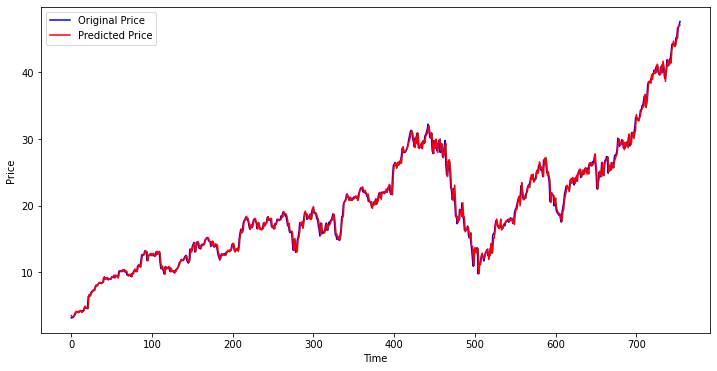

In [99]:
plt.figure(figsize= (12,6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel("Time")
plt.ylabel( "Price ")
plt.legend ()
plt.show()